In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip -qq '/content/drive/MyDrive/final_project/dataset.zip' -d '/content/drive/MyDrive/final_project/data'

In [120]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# 1. 데이터 확인 및 전처리


In [4]:
# order_id 공통
df_orders = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# order_id 공통
df_order_payments = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# order_id 공통
df_order_reviews = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# order_id, seller_id 공통
df_order_items = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# product_id 공통
df_products = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# seller_id, zip_code_prefix 공통
df_sellers = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
# customer_id, zip_code_prefix 공통
df_customers = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
# zip_code_prefix 공통
df_geolocation = pd.read_csv('/content/drive/MyDrive/final_project/data/olist_geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
df_product_cat_translation = pd.read_csv('/content/drive/MyDrive/final_project/data/product_category_name_translation.csv')
df_product_cat_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 데이터 갯수 확인(order, review, product, seller, customer)

In [13]:
table = np.array([
    [
        df_orders['order_id'].nunique(),
        df_order_reviews['review_id'].nunique(),
        df_products['product_id'].nunique(),
        df_sellers['seller_id'].nunique(),
        df_customers['customer_id'].nunique(),
    ],
    [
        df_orders['order_id'].count(),
        df_order_reviews['review_id'].count(),
        df_products['product_id'].count(),
        df_sellers['seller_id'].count(),
        df_customers['customer_id'].count(),
    ],
])

pd.DataFrame(data=np.vstack((table)).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
             columns=['nunique', 'count'])

,nunique,count
orders,99441,99441
reviews,98410,99224
sellers,32951,32951
products,3095,3095
customers,99441,99441


### ✅결과)
- review를 제외한 나머지 항목의 갯수 일치
- 각 customer_id 당 중복되는 order_id 없음

## 1-1. order

### ✅결과)
- order_purchase_timestamp 와 order_estimated_delivery_date 값은 고객의 주문과 동시에 자동으로 생성됨
- order_status 컬럼 설명
    - delivered: 배송완료(대다수 주문 건의 주문 상태)
    - shipped: 결제 완료 및 배송 시작
    - invoiced / approved / processing: 결제완료 및 배송 준비중
    - unavailable: 주문 승인 날짜(order_approved_at) 컬럼에 값이 있음, 따라서 재고 없음 등의 사유로 seller 측에서 취소한 경우
    - canceled: order_approved_at, delivered_carrier_date, delivered_customer_date에 해당하는 날짜에 값이 있음. 따라서 이는 고객이 취소한 경우
- 유효한 주문만을 분석하기 위해 판매 사이클에 맞지 않는 데이터 삭제
    - canceled
    - unavailable

In [14]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [16]:
df_orders[df_orders['order_status'] == 'canceled'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 397 to 99347
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       625 non-null    object
 1   customer_id                    625 non-null    object
 2   order_status                   625 non-null    object
 3   order_purchase_timestamp       625 non-null    object
 4   order_approved_at              484 non-null    object
 5   order_delivered_carrier_date   75 non-null     object
 6   order_delivered_customer_date  6 non-null      object
 7   order_estimated_delivery_date  625 non-null    object
dtypes: object(8)
memory usage: 43.9+ KB


In [17]:
df_orders = df_orders[df_orders['order_status'] != 'canceled']
df_orders = df_orders[df_orders['order_status'] != 'unavailable']
df_orders.order_status.value_counts()

delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [18]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98207 non-null  object
 1   customer_id                    98207 non-null  object
 2   order_status                   98207 non-null  object
 3   order_purchase_timestamp       98207 non-null  object
 4   order_approved_at              98188 non-null  object
 5   order_delivered_carrier_date   97583 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  98207 non-null  object
dtypes: object(8)
memory usage: 6.7+ MB


### ☝주문 상태 분포

Text(0.5, 1.0, 'Distribution of Order Status')

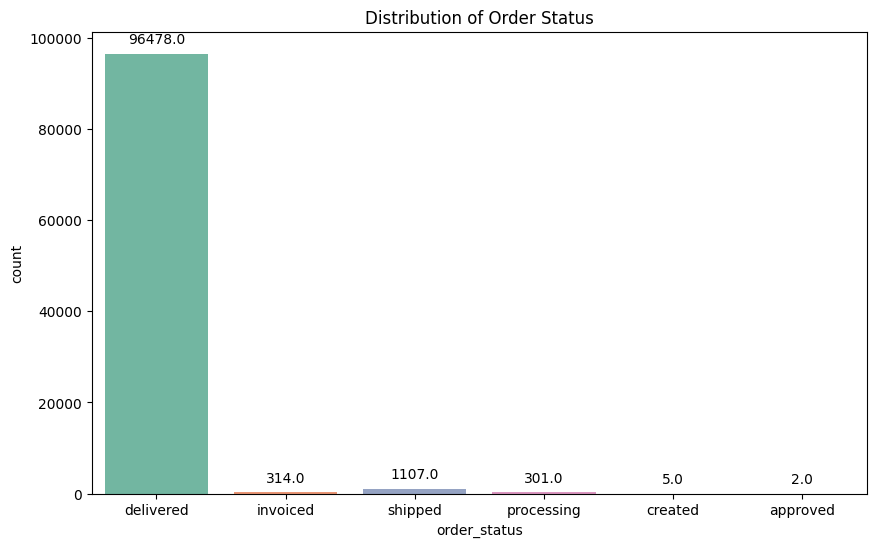

In [19]:
plt.figure(figsize = (10,6))
colors = sns.color_palette('Set2', n_colors=len(df_order_reviews['review_score'].unique()))

ax = sns.countplot(data = df_orders, x = 'order_status', palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Order Status')

## 1-2. order_payments

### ✅결과)
- order_id 컬럼에서 4,446개의 중복행 존재
- order_id가 같으면 payment_sequential에서 연속된 숫자로 행방향으로 기재되어 있음
    - ex) order_id == 'e6a66a8350bb88497954d37688ab123e'
    - 동일 주문id에 8개 행 존재('payment_sequential') ⇒ 1개 주문 id가 8번 각각 결제(바우처를 8개 사용)
- payment_type에는 5개의 종류가 있음('not defined' 포함)
    - payment_installments > 1 ⇒ credit_card만 입력됨
    - 만약 payment_type == credit_card ⇒ 구매일자와 주문승인일자의 간격이 그리 크지 않음. 특이사항으로, 'boleto'라는 브라질의 특수한 결제 방식이 있음: 현금후불결제로, 발행된 청구서를 갖고 지정된 은행, 상점, 약국 등에서 결제하는 방식인데, 브라질의 낮은 은행계좌보유율(35%)로 인해 생긴 제도임. 우리나라의 지로 결제와 비슷하게 생각하면 됨.


In [20]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
df_order_payments.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [22]:
df_order_payments.order_id.nunique()

99440

In [23]:
# 'order_id' 중복행 확인
tmp = df_order_payments[df_order_payments['order_id'].duplicated()]
tmp

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [24]:
df_order_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [25]:
# payment_installments: 고객이 선택한 할부 횟수
df_order_payments[df_order_payments['payment_installments'] > 1]['payment_type'].value_counts()

credit_card    51338
Name: payment_type, dtype: int64

In [26]:
# payment_sequential: 고객이 둘 이상의 결제 방법 사용한 경우
df_order_payments[(df_order_payments['payment_type'] == 'credit_card') & (df_order_payments['payment_sequential'] > 1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
199,332c6742772f2df936696b6512b10edb,2,credit_card,6,134.55
949,98f0e2b0d85754ca3b4e06d70f0f63a2,2,credit_card,2,70.00
1102,5373c26702420c0f842871e489365e20,2,credit_card,1,12.59
1135,eca3005a4f60ceb77b67a30b74095ddf,2,credit_card,1,3.99
1294,b18478bbf9b2283e3d12452f69fd9ce2,2,credit_card,1,79.92
...,...,...,...,...,...
102295,c75e9a685439f75e990bcf13443f02c5,2,credit_card,4,497.54
102341,407cc9b2c7575dbff71cb23b6cc26814,2,credit_card,7,76.39
102674,ef13a698cf88c9e17ccca0261e0b9e7a,2,credit_card,8,94.49
102724,55adc5cef9556477770f0b858669f8fc,2,credit_card,2,65.55


In [27]:
# 동일 주문id가 여러 결제방법 사용한 경우
df_order_payments[df_order_payments['order_id'] == 'e6a66a8350bb88497954d37688ab123e']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
16289,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30
39743,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95
42000,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75
45326,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11
71825,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16
96318,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83


In [28]:
df_order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [29]:
df_order_payments[df_order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


## 1-3. order_reviews

### ✅결과)
- review_id와 order_id 컬럼에서 중복된 행들이 존재함
    - 만약 여러 행의 review_id가 동일하다면, order_id를 제외한 나머지 컬럼값(리뷰타이틀, 리뷰내용, 리뷰생성날짜, 리뷰답변날짜)이 전부 동일함.
    - 반대로, 여러 행의 order_id가 동일하다면, 모든 컬럼의 값(리뷰타이틀, 리뷰내용, 리뷰생성날짜, 리뷰답변날짜)이 다 다름
    - order_id를 이용한 상품, 판매자별 review_score 분석가능
- review_score : 4, 5가 77% 정도로 대부분을 차지함
- review_comment_title, review_comment_message에 각각 88.3%, 58.7% 가 결측치(null값)

In [30]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
print(df_order_reviews['review_id'].nunique())
print(df_order_reviews['order_id'].nunique())

98410
98673


In [32]:
# 'review_id'에 대해 중복행 확인
tmp = df_order_reviews[df_order_reviews['review_id'].duplicated()]
print(tmp.shape)
tmp.head()

(814, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18


In [33]:
# 'review_id'가 동일한 예시
df_order_reviews[df_order_reviews['review_id'] == '308316408775d1600dad81bd3184556d']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4545,308316408775d1600dad81bd3184556d,27e5ed2ecefbe0bcc9ae0c9b26b763c3,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
53661,308316408775d1600dad81bd3184556d,8b3c2785144e72ccba9b0213f0f1cd1e,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09


In [34]:
# 'order_id'에 대해 중복행 확인
tmp = df_order_reviews[df_order_reviews['order_id'].duplicated()]
print(tmp.shape)
tmp.head()

(551, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [35]:
# 'order_id'가 동일한 예시
df_order_reviews[df_order_reviews['order_id'] == '5040757d4e06a4be96d3827b860b4e7c']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1028,afd9b3d196f0acd81d79d8ccd79c2430,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-10-31 00:00:00,2017-11-04 21:12:29
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48


### ☝리뷰점수 분포 확인

Text(0.5, 1.0, 'Distribution of Review Scores')

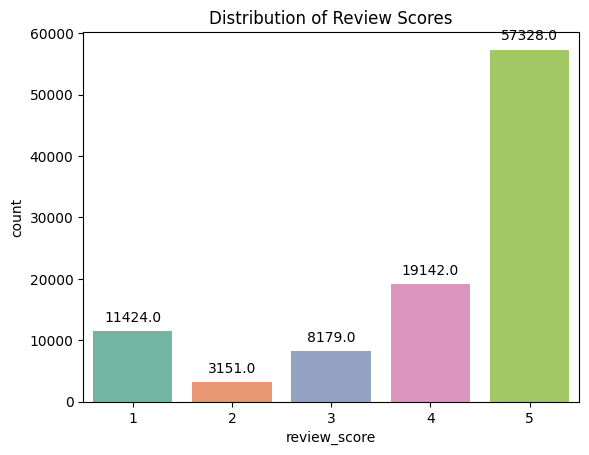

In [36]:
colors = sns.color_palette('Set2', n_colors=len(df_order_reviews['review_score'].unique()))

ax = sns.countplot(x='review_score', data=df_order_reviews, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Review Scores')

In [37]:
# null값 비율 확인
print(df_order_reviews['review_comment_title'].isnull().sum() / len(df_order_reviews))
print(df_order_reviews['review_comment_message'].isnull().sum() / len(df_order_reviews))

0.8834153027493349
0.5870253164556962


## 1-4. order_items

### ✅결과)
- order_id, product_id, seller_id에 중복된 행들이 있음
    - 동일한 order_id는 같은 product_id, seller_id를 가짐
    - 동일한 order_id는 order_item_id컬럼에 1~N까지의 연속숫자를 가짐 ⇒ 해당 상품의 갯수에 따라 행이 늘어남
- order_payments데이터셋의 payment_value는 order_items데이터셋의 price + freight_value 임
    - 그러나 일치하지 않는 경우, 차액은 이자금액으로 판단됨

In [38]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
# 'order_id'에 대해 중복행 확인
tmp = df_order_items[df_order_items['order_id'].duplicated()]
print(tmp.shape)
tmp.tail()

(13984, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.9,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.0,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19


In [40]:
# 'order_id' 중복행 예시
df_order_items[df_order_items['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [41]:
df_order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [42]:
# 'product_id'에 대해 중복행 확인
tmp = df_order_items[df_order_items['product_id'].duplicated()]
print(tmp.shape)
tmp.head()

(79699, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
41,0019c29108428acffd089c36103c9440,1,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-03-12 06:50:26,59.90,19.95
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


In [43]:
# 'seller_id'에 대해 중복행 확인
tmp = df_order_items[df_order_items['seller_id'].duplicated()]
print(tmp.shape)
tmp.head()

(109555, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
41,0019c29108428acffd089c36103c9440,1,28b4eced95a52d9c437a4caf9d311b95,77530e9772f57a62c906e1c21538ab82,2018-03-12 06:50:26,59.90,19.95
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


## 1-5.products & product_cat_translation

### ✅결과)
- 중복행은 없음
- 총 73개 카테고리, 32,951개의 제품이 있음
- 제품 수 top 1 카테고리: bed_bath_table(침대 욕실 테이블)

In [44]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [45]:
df_product_cat_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [46]:
# 'product_id' 중복값 확인
df_products[df_products['product_id'].duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [47]:
print('The Number of Product Category: ', df_products['product_category_name'].nunique(), '\n')

print('Top 20 categoy by the number of product:')
df_products['product_category_name'].value_counts().head(20)

The Number of Product Category:  73 

Top 20 categoy by the number of product:


cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
Name: product_category_name, dtype: int64

In [48]:
# 상품 수 top 1 카테고리
df_product_cat_translation[df_product_cat_translation['product_category_name'] == 'cama_mesa_banho']

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table


## 1-6. sellers

### ✅결과)
- 중복행 없음
- 총 3,095명의 판매자가 있음

In [49]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [50]:
# 'seller_id' 중복행 확인
df_sellers[df_sellers['seller_id'].duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


## 1-7. customers

### ✅결과)
- customer_id에는 중복 행 없으나, customer_unique_id에는 중복이 있음 ⇒ 고유 고객은 결국 customer_unique_id의 96,096명임
- 고객의 가장 많은 수가 sau paulo(도시), SP(주)에 살고있음
- zipcode 22790인 곳으로 제품이 가장 많이 발송됨
- 고유 주문id '8d50f5eadf50201ccdcedfb9e2ac8455'의 고유 주문 수가 가장 높음

In [51]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [52]:
df_customers['customer_unique_id'].nunique()

96096

In [53]:
df_customers['customer_id'].nunique()

99441

In [54]:
df_customers[df_customers['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [55]:
df_customers[df_customers['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [56]:
# 단일 고객 수 확인
print('The distinct number of customers:', format(df_customers['customer_unique_id'].nunique(),','), '\n')

# 'customer_unique_id' 중복행 예
df_customers[df_customers['customer_unique_id'] == 'a40096fc0a3862e9e12bc55b5f8e6ab2']

The distinct number of customers: 96,096 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
197,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
35912,039bbed64cc5e2160b7ca4ac6b09449c,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ


In [57]:
# 고유 주문 수가 가장 높은 customer_unique_id
df_customers.groupby('customer_unique_id').agg(unique_orders=('customer_id', 'nunique'), unique_customers=('customer_unique_id', 'nunique')).reset_index().sort_values(by='unique_orders', ascending=False).head(5)

,customer_unique_id,unique_orders,unique_customers
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17,1
23472,3e43e6105506432c953e165fb2acf44c,9,1
37797,6469f99c1f9dfae7733b25662e7f1782,7,1
76082,ca77025e7201e3b30c44b472ff346268,7,1
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,1


### ☝단일 고객의 top 10 도시

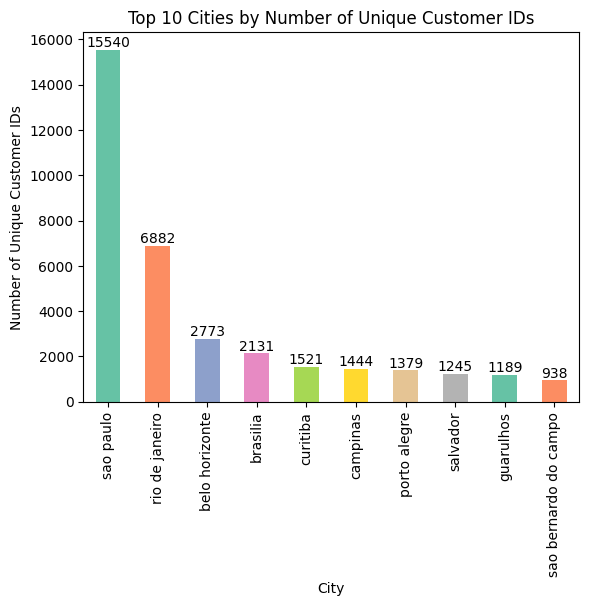

In [58]:
top_cities = df_customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False).head(10)
colors = sns.color_palette('Set2', n_colors=len(top_cities))

# 막대 그래프 그리기
top_cities.plot(kind='bar', color=colors)

plt.title('Top 10 Cities by Number of Unique Customer IDs')
plt.xlabel('City')
plt.ylabel('Number of Unique Customer IDs')

# 막대 위에 숫자 데이터 값 표시
for index, value in enumerate(top_cities):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

### ☝단일 고객의 top 10 주

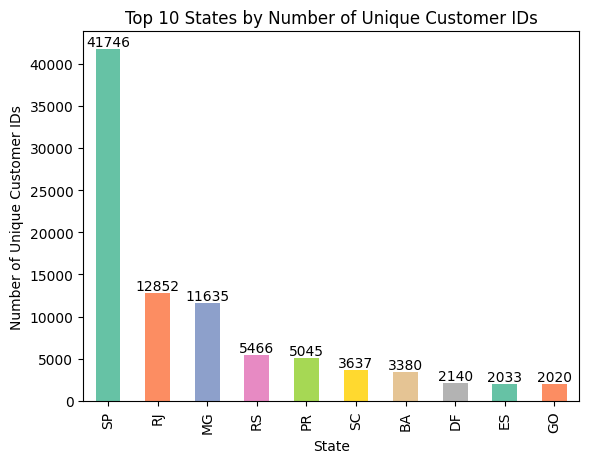

In [59]:
top_states = df_customers.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).head(10)
colors = sns.color_palette('Set2', n_colors=len(top_states))
top_states.plot(kind = 'bar', color = colors)
plt.title('Top 10 States by Number of Unique Customer IDs')
plt.xlabel('State')
plt.ylabel('Number of Unique Customer IDs')

for index, value in enumerate(top_states):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

### ☝단일 고객의 Zipcode 분포 top 10

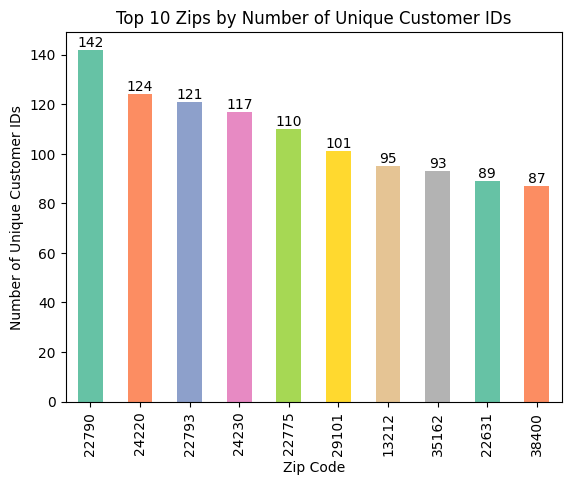

In [60]:
top_zip = df_customers.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False).head(10)
colors = sns.color_palette('Set2', n_colors=len(top_zip))
top_zip.plot(kind = 'bar', color = colors)
plt.title('Top 10 Zips by Number of Unique Customer IDs')
plt.xlabel('Zip Code')
plt.ylabel('Number of Unique Customer IDs')

for index, value in enumerate(top_zip):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

## 1-8. geolocation

### ✅결과)
- 각 지역의 위도/경도 정보
- zipcode가 같더라도 위도/경도 다른 경우 존재
    - ex) zipcode: 1046

In [61]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [65]:
df_geolocation.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


### 1-9. 전체 테이블 병합
- df_geolocation 제외한 나머지 테이블 모두 병합

In [63]:
merged_df = pd.merge(df_orders, df_order_payments, on='order_id')
merged_df = pd.merge(merged_df, df_order_items, on='order_id')
merged_df = pd.merge(merged_df, df_products, on='product_id')
merged_df = pd.merge(merged_df, df_sellers, on='seller_id')
merged_df = pd.merge(merged_df, df_customers, on='customer_id')
merged_df = pd.merge(merged_df, df_order_reviews, on='order_id')
merged_df = pd.merge(merged_df, df_product_cat_translation, on='product_category_name')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115066 entries, 0 to 115065
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115066 non-null  object 
 1   customer_id                    115066 non-null  object 
 2   order_status                   115066 non-null  object 
 3   order_purchase_timestamp       115066 non-null  object 
 4   order_approved_at              115052 non-null  object 
 5   order_delivered_carrier_date   114346 non-null  object 
 6   order_delivered_customer_date  113202 non-null  object 
 7   order_estimated_delivery_date  115066 non-null  object 
 8   payment_sequential             115066 non-null  int64  
 9   payment_type                   115066 non-null  object 
 10  payment_installments           115066 non-null  int64  
 11  payment_value                  115066 non-null  float64
 12  order_item_id                 

In [71]:
merged_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,...,88032,florianopolis,SC,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,housewares
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,1,credit_card,...,1315,sao paulo,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares
7,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,1,credit_card,...,1315,sao paulo,SP,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares
8,1fa40f202d5d233b6491e976c557b822,50fd5707c28d0a64dc20d67f937dd9ba,delivered,2017-09-23 22:11:10,2017-09-23 22:25:11,2017-09-26 17:27:54,2017-10-19 21:09:21,2017-11-13 00:00:00,1,credit_card,...,69043,manaus,AM,4b70092fc12f2328972d5ff1022d87e9,4,NaN,NaN,2017-10-20 00:00:00,2017-10-23 04:13:41,housewares
9,41c045db2d1876be9f05cf4a787693b2,a286f46d6e54cc0179bbb0ee07b0df5e,delivered,2017-08-16 14:06:30,2017-08-16 14:55:20,2017-08-18 15:41:40,2017-08-21 15:05:13,2017-08-29 00:00:00,1,credit_card,...,5640,sao paulo,SP,b9e086024ceb0234e5950016497a4928,5,NaN,NaN,2017-08-22 00:00:00,2017-08-26 02:31:53,housewares


In [69]:
# null값 조회
merged_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date        720
order_delivered_customer_date      1864
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1


In [85]:
# 날짜 컬럼 형변환후 연, 월, 요일별로 분해
# datetime 형식으로 구매 일자 변경
date_time = merged_df['order_purchase_timestamp'].str.split()

date_list = []
time_list = []
for x in range(date_time.shape[0]) :
    date_list.append(date_time[x][0])
    time_list.append(date_time[x][1])

merged_df['purchase_date'], merged_df['purchase_time'] = date_list, time_list
merged_df = merged_df.drop(columns = {'order_purchase_timestamp'})

merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase_date'])

# 구매 일자를 연, 월, 요일별로 분해
merged_df['year'] = merged_df['purchase_date'].dt.year
merged_df['month'] = merged_df['purchase_date'].dt.month
merged_df['day_of_week'] = merged_df['purchase_date'].dt.day_name()

# olist_df['purchase_time']에 시간 값만 저장
merged_df['purchase_time'] = merged_df['purchase_time'].str.slice(0, 2)

---

# 2. EDA

### ☝카테고리 별 주문 건수

In [83]:
category_df = pd.DataFrame(merged_df['product_category_name_english'].value_counts())
category_df = category_df.reset_index().rename(columns = {'index' : 'category', 'product_category_name_english' : 'count'})
category_df

px.bar(category_df, x="category", y='count',
       labels={"category":"카테고리","count":"총 주문건수"},
       title='카테고리별 주문 건수', color = px.colors.qualitative.Pastel1 + px.colors.qualitative.Pastel2 + px.colors.qualitative.Pastel + px.colors.qualitative.Light24 + px.colors.qualitative.Safe + px.colors.qualitative.Set2,
       color_discrete_map='identity')

### ▶ 주문 건수가 가장 많은 상위 5개 카테고리로는
    1. 'bed_bath_table'
    2. 'health_beauty'
    3. 'sports_leisure'
    4. 'furniture_decor'
    5. 'computers_accessories'

### ☝매출액 추이

In [86]:
date_purchase_df = merged_df[['payment_value', 'purchase_date', 'year', 'month', 'day_of_week']]
date_purchase_df['purchase_date'].describe()

count                  115066
unique                    613
top       2017-11-24 00:00:00
freq                     1398
first     2016-09-04 00:00:00
last      2018-09-03 00:00:00
Name: purchase_date, dtype: object

### ▶ canceled, unavailable 주문 건수를 제외하면 2016년 9월 4일부터 2018년 9월 3일 기간 동안의 데이터임을 확인할 수 있음

---

## 시간대별 매출액

In [138]:
time_purchase_df = merged_df[['payment_value', 'purchase_time']]

# 시간별 매출액의 합계 피벗테이블 생성
time_purchase_pt = pd.pivot_table(data = time_purchase_df,
                                   index = 'purchase_time',
                                   values = 'payment_value',
                                   aggfunc = 'sum').reset_index()
# 시간별 주문 건수 피벗테이블 생성
time_purchase_pt2 = pd.pivot_table(data = time_purchase_df,
                                  index = 'purchase_time',
                                  values = 'payment_value',
                                  aggfunc = 'count').reset_index()
time_purchase_pt = pd.merge(time_purchase_pt, time_purchase_pt2, on = 'purchase_time')
time_purchase_pt = time_purchase_pt.rename(columns = {'payment_value_x' : 'value_sum', 'payment_value_y' : 'value_count'})
time_purchase_pt

,purchase_time,value_sum,value_count
0,00,452907.30,2819
1,01,204129.92,1306
2,02,90330.78,593
3,03,48734.51,309
4,04,35384.74,251
5,05,28519.49,211
6,06,79742.92,555
7,07,218747.23,1386
8,08,585299.36,3461
9,09,1009866.68,5481


<Axes: xlabel='purchase_time', ylabel='value_count'>

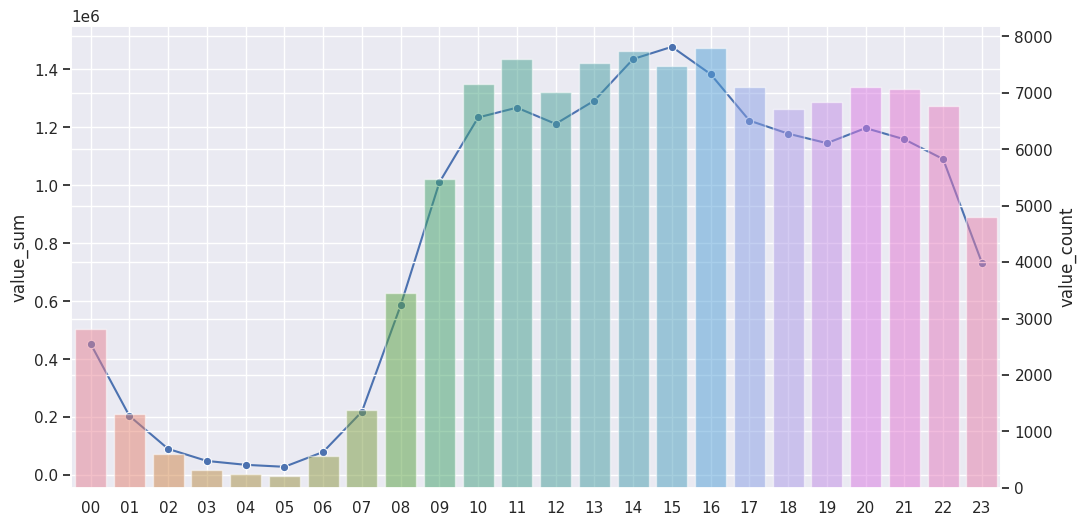

In [140]:
# 막대그래프 = 시간대별 주문 건수, 선그래프 = 시간대별 매출액
colors = sns.color_palette('husl', n_colors=len(time_purchase_pt))
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = time_purchase_pt['value_sum'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(time_purchase_pt, x='purchase_time', y='value_count', alpha=0.5, ax=ax2, palette=colors)

### ▶ 그래프 해석
- 대부분 사람들의 수면 시간인 오후 11시 - 오전 8시 사이의 매출액과 주문 건수가 비교적 적은 것음
- 활동 시간인(평일의 경우, 일하는 시간) 오전 9시 - 오후 5시 사이에 매출액과 주문 건수가 가장 많음 -> 즉, 일하는 시간에 쇼핑을 많이 하는 것을 알 수 있음

---

## 일별 매출액

In [87]:
date_purchase_pt = pd.pivot_table(data = date_purchase_df,
                                   index = 'purchase_date',
                                   values = 'payment_value',
                                   aggfunc = 'sum').reset_index()
date_purchase_pt

,purchase_date,payment_value
0,2016-09-04,272.46
1,2016-10-03,559.53
2,2016-10-04,12996.11
3,2016-10-05,13889.82
4,2016-10-06,9507.96
...,...,...
608,2018-08-26,10428.77
609,2018-08-27,6084.33
610,2018-08-28,5012.70
611,2018-08-29,4262.66


In [89]:
# 일별 매출액
px.line(date_purchase_pt, x = 'purchase_date', y = 'payment_value',
        labels={"purchase_date":"날짜","payment_value":"매출액"},
        title='일별 매출액 추이')

### ▶ 그래프 해석
- 2017년 초까지는 매출액이 저조
- 2017년 2월부터 매출액 증가하기 시작
- 2017년 11월 24일에 최고 매출 달성(블랙 프라이데이)
- 2017년 9월 29일에 두번째로 높은 매출 달성

---

## 요일별 매출액

In [133]:
# 요일별 매출액의 합계 피벗테이블 생성
dayofweek_purchase_pt = pd.pivot_table(data = date_purchase_df,
                                       index = 'day_of_week',
                                       values = 'payment_value',
                                       aggfunc = 'sum').reset_index()
# 요일별 주문 건수 피벗테이블 생성
dayofweek_purchase_pt2 = pd.pivot_table(data = date_purchase_df,
                                  index = 'day_of_week',
                                  values = 'payment_value',
                                  aggfunc = 'count').reset_index()
dayofweek_purchase_pt = pd.merge(dayofweek_purchase_pt, dayofweek_purchase_pt2, on = 'day_of_week')
dayofweek_purchase_pt = dayofweek_purchase_pt.rename(columns = {'payment_value_x' : 'value_sum', 'payment_value_y' : 'value_count'})

# 인덱스 재배열
dayofweek_purchase_pt = dayofweek_purchase_pt.reindex([3, 1, 5, 6, 4, 0, 2])
dayofweek_purchase_pt = dayofweek_purchase_pt.reset_index()
dayofweek_purchase_pt = dayofweek_purchase_pt.drop(columns = {'index'})
dayofweek_purchase_pt

,day_of_week,value_sum,value_count
0,Sunday,2223202.08,13660
1,Monday,3200661.26,18669
2,Tuesday,3246160.61,18680
3,Wednesday,3034385.20,17948
4,Thursday,3014505.73,17215
5,Friday,2964194.06,16464
6,Saturday,2097690.40,12430


<Axes: xlabel='day_of_week', ylabel='value_count'>

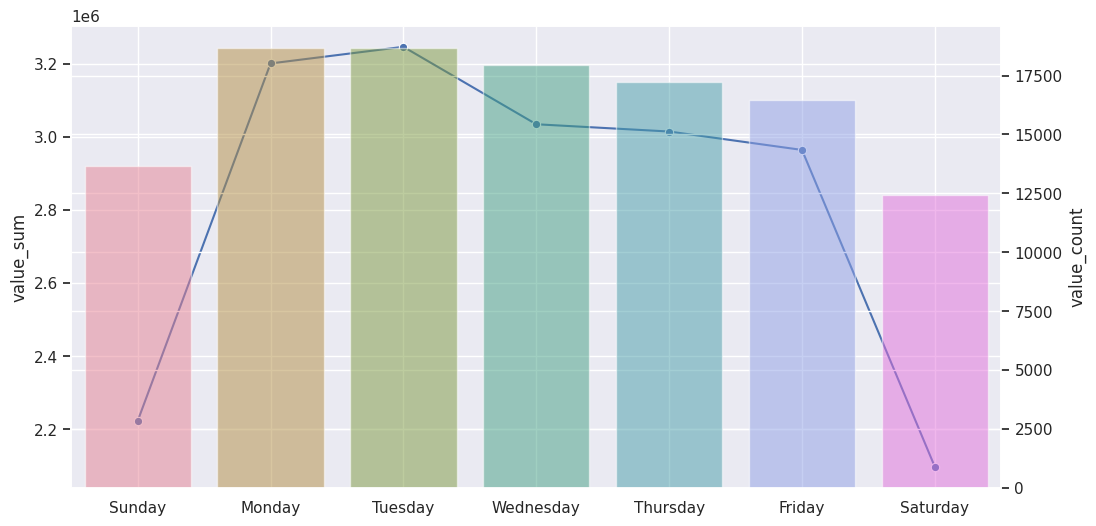

In [139]:
# 막대그래프 = 요일별 주문 건수, 선그래프 = 요일별 매출액
colors = sns.color_palette('husl', n_colors=len(dayofweek_purchase_pt))
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = dayofweek_purchase_pt['value_sum'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(dayofweek_purchase_pt, x='day_of_week', y='value_count', alpha=0.5, ax=ax2, palette=colors)


### ▶ 그래프 해석
- 평일의 매출액이 주말 매출액보다 높음
- 매출액이 가장 높은 요일은 월요일
- 매출액이 가장 적은 요일은 토요일
- 위 결과로 예상하건대, 사람들이 평일 일하는 요일에 물건을 구매하는 경향이 있음을 알 수 있음

---

## 월별 매출액

In [130]:
# 월별 매출액
# 월별 매출액의 합계 피벗테이블 생성
month_purchase_pt = pd.pivot_table(data = date_purchase_df,
                                   index = 'month',
                                   values = 'payment_value',
                                   aggfunc = 'sum').reset_index()
# 월별 주문 건수 피벗테이블 생성
month_purchase_pt2 = pd.pivot_table(data = date_purchase_df,
                                  index = 'month',
                                  values = 'payment_value',
                                  aggfunc = 'count').reset_index()
month_purchase_pt = pd.merge(month_purchase_pt, month_purchase_pt2, on = 'month')
month_purchase_pt = month_purchase_pt.rename(columns = {'payment_value_x' : 'value_sum', 'payment_value_y' : 'value_count'})
month_purchase_pt

,month,value_sum,value_count
0,1,1550426.63,9269
1,2,1610553.81,9729
2,3,1947500.04,11444
3,4,1944677.07,10841
4,5,2184587.30,12368
5,6,1878149.63,11032
6,7,2022196.11,11930
7,8,2023661.75,12419
8,9,1004104.80,5003
9,10,1056939.65,5824


<Axes: xlabel='month', ylabel='value_count'>

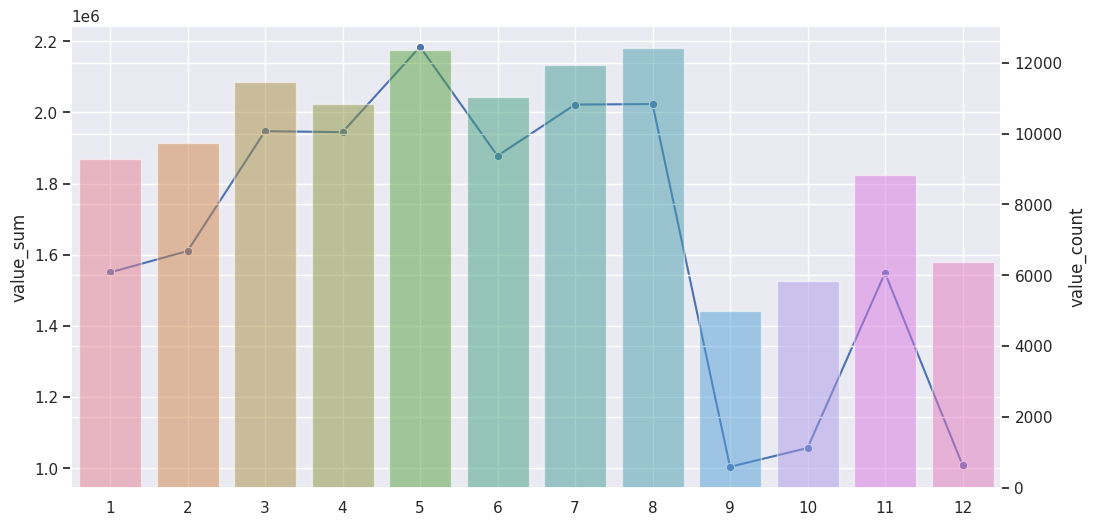

In [132]:
# 막대그래프 = 월별 주문 건수, 선그래프 = 월별 매출액
colors = sns.color_palette('husl', n_colors=len(month_purchase_pt))
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = month_purchase_pt['value_sum'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(month_purchase_pt, x='month', y='value_count', alpha=0.5, ax=ax2, palette=colors)

### ▶ 그래프 해석
- 2016년 9월 ~ 2018년 9월 데이터 셋
- 2016년 1-8월 데이터셋 없음, 2018년 9-12 데이터셋 없음
- 2016년 9-12월과 2017년 1-2월 데이터 있더라도 서비스 초기라 매출액과 주문건수 적음
- 이를 제외하고 5월과 8월에 매출액과 주문 건수가 다른 달에 비해 높음

---

## 연도별 매출액

In [90]:
# 연도별 매출액의 합계 피벗테이블 생성
year_purchase_pt = pd.pivot_table(data = date_purchase_df,
                                  index = 'year',
                                  values = 'payment_value',
                                  aggfunc = 'sum').reset_index()
# 연도별 주문 건수 피벗테이블 생성
year_purchase_pt2 = pd.pivot_table(data = date_purchase_df,
                                  index = 'year',
                                  values = 'payment_value',
                                  aggfunc = 'count').reset_index()
year_purchase_pt = pd.merge(year_purchase_pt, year_purchase_pt2, on = 'year')
year_purchase_pt = year_purchase_pt.rename(columns = {'payment_value_x' : 'value_sum', 'payment_value_y' : 'value_count'})
year_purchase_pt

,year,value_sum,value_count
0,2016,66822.03,359
1,2017,8874986.99,52258
2,2018,10838990.32,62449


<Axes: xlabel='year', ylabel='value_count'>

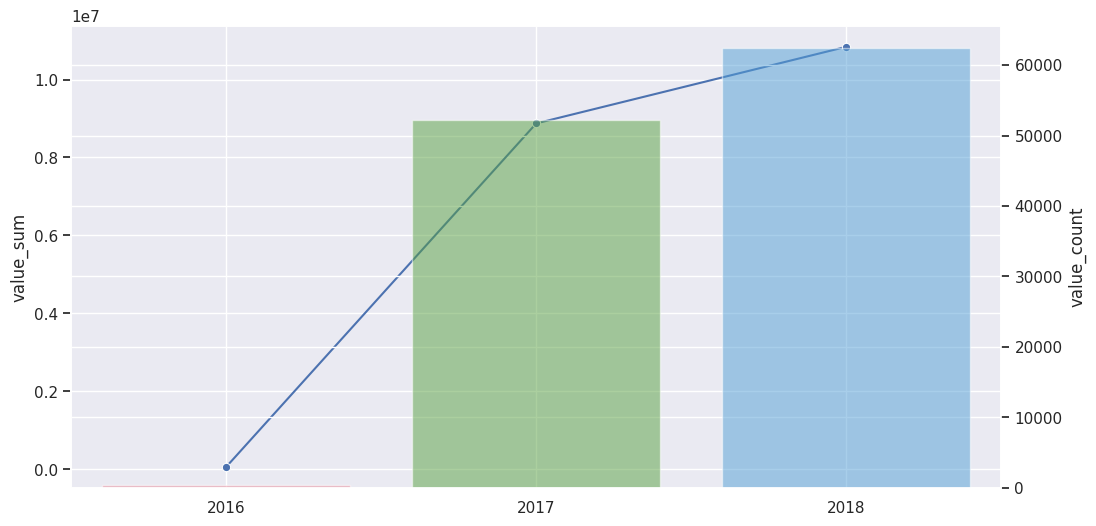

In [128]:
# 막대그래프 = 연도별 주문 건수, 선그래프 = 연도별 매출액
sns.set(style="darkgrid")
colors = sns.color_palette('husl', n_colors=len(year_purchase_pt))

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = year_purchase_pt['value_sum'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(year_purchase_pt, x='year', y='value_count', alpha=0.5, ax=ax2, palette=colors)

### ▶ 그래프 해석
- 해가 지날수록 매출액과 주문 건수가 증가함

---

### ☝카테고리 별 평균 배송 시간

In [142]:
category_delivery_df = merged_df[['product_category_name_english', 'purchase_date', 'order_delivered_customer_date']].dropna(axis = 0).reset_index().drop(columns = {'index'})

# 배송된 날짜만 추출
delivered_date = category_delivery_df['order_delivered_customer_date'].str.split()

delivered_date_list = []
for x in range(delivered_date.shape[0]) :
    delivered_date_list.append(delivered_date[x][0])

# 컬럼에 저장
category_delivery_df['order_delivered_customer_date'] = pd.to_datetime(delivered_date_list)

# 주문 날짜와 배송 도착 날짜의 차이를 계산하여 컬럼에 저장
category_delivery_df['delivered_date'] = category_delivery_df['order_delivered_customer_date'] - category_delivery_df['purchase_date']
category_delivery_df = category_delivery_df.drop(columns = {'order_delivered_customer_date', 'purchase_date'})

# 카테고리별 배송까지 걸린 날짜의 평균 피벗테이블 생성
category_delivery_pt = pd.pivot_table(data = category_delivery_df,
                                   index = 'product_category_name_english',
                                   values = 'delivered_date',
                                   aggfunc = 'mean').reset_index()

# 배송까지 걸린 날짜를 기준으로 오름차순으로 정렬
category_delivery_pt = category_delivery_pt.sort_values(by = 'delivered_date', ascending=True)
category_delivery_pt['delivered_date'] = category_delivery_pt['delivered_date'].dt.days
category_delivery_pt

,product_category_name_english,delivered_date
3,arts_and_craftmanship,5
52,la_cuisine,7
9,books_imported,8
29,fashion_childrens_clothes,8
58,party_supplies,8
...,...,...
12,christmas_supplies,14
46,home_comfort_2,14
61,security_and_services,15
31,fashion_shoes,15


In [143]:
px.line(category_delivery_pt,
        x = 'product_category_name_english',
        y = 'delivered_date',
        labels={'product_category_name_english' : '카테고리 명', 'delivered_date' : '평균 배송 시간'},
        title = '카테고리별 평균 배송 시간')

### ▶ 그래프 해석
- 평균 배송 시간은 최소 5일에서 최대 20일까지 소요
- 평균 배송 시간이 가장 짧은 카테고리 top5
    1. arts_and_craftmanship
    2. la_cuisine
    3. books_imported
    4. fashion_childrens_clothes
    5. party_supplies
- 평균 배송 시간이 가장 긴 카테고리 top5
    1. office_furniture
    2. fashion_shoes
    3. security_and_services
    4. home_comfort_2
    5. christmas_supplies

---

### ☝카테고리 별 평균 평점




In [144]:
delivery_score_df = merged_df[['order_delivered_customer_date', 'purchase_date', 'review_score']].dropna(axis = 0).reset_index()
delivery_score_df = delivery_score_df.drop(columns = {'index'})

# 배송된 날짜만 추출
delivered_date = delivery_score_df['order_delivered_customer_date'].str.split()

# 리스트에 저장
delivered_date_list = []
for x in range(delivered_date.shape[0]) :
    delivered_date_list.append(delivered_date[x][0])

# datetime 형식으로 컬럼에 저장
delivery_score_df['order_delivered_customer_date'] = pd.to_datetime(delivered_date_list)

# 주문 시간과 배송 도착 날짜의 차이를 컬럼에 저장하고 나머지 컬럼 삭제
delivery_score_df['delivered_date'] = delivery_score_df['order_delivered_customer_date'] - delivery_score_df['purchase_date']
delivery_score_df = delivery_score_df.drop(columns = {'order_delivered_customer_date', 'purchase_date'})
delivery_score_df['delivered_date'] = delivery_score_df['delivered_date'].dt.days
delivery_score_df


,review_score,delivered_date
0,4,8
1,4,8
2,4,8
3,4,3
4,5,5
...,...,...
113197,5,7
113198,1,4
113199,5,5
113200,5,3


In [145]:
# 배송까지 걸린 날짜 범주화
delivery_dic = {1 : '0~5days', 2 : '5~10days', 3 : '10~15days', 4 : '15~20days', 5 : '20days~'}

delivery_legend_list = []
for date in delivery_score_df['delivered_date'] :
    if 0 <= date < 5 :
        delivery_legend_list.append(1)
    elif 5 <= date < 10 :
        delivery_legend_list.append(2)
    elif 10 <= date < 15 :
        delivery_legend_list.append(3)
    elif 15 <= date < 20 :
        delivery_legend_list.append(4)
    else :
        delivery_legend_list.append(5)

delivery_score_df['delivery_legend'] = delivery_legend_list

# 날짜 범주화당 평균 리뷰 점수를 구하는 피벗테이블 생성
delivery_score_pt = pd.pivot_table(data = delivery_score_df,
                                   index = 'delivery_legend',
                                   values = 'review_score',
                                   aggfunc = 'mean').reset_index()

# 데이터를 delivery_dic의 value 값으로 변경
delivery_score_pt['delivery_legend'] = delivery_dic.values()
delivery_score_pt


,delivery_legend,review_score
0,0~5days,4.389456
1,5~10days,4.283921
2,10~15days,4.189174
3,15~20days,4.052653
4,20days~,3.233234


In [151]:
px.bar(delivery_score_pt, x = 'delivery_legend', y = 'review_score',
       labels = {'delivery_legend' : '배송시간', 'review_score' : '평균 평점'},
       title='배송시간별 평균 평점', color=["rgb(239,209,159)", "rgb(255,185,144)", "rgb(255,190,159)", "rgb(255,163,139)", "rgb(255,179,171)"],
       color_discrete_map="identity")

### ▶ 그래프 해석
- 배송시간이 길수록 고객 서비스 불만족이 높아지고 부정적인 리뷰를 받을 가능성이 높아지는 것을 알 수 있음